<a href="https://colab.research.google.com/github/uankit/CarDekho_ML_Modell/blob/main/CarDekho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Problem Definition**
#### The problem we will be exploring is **Regression**

#### **Statement :**
> Given Car Dekho dataset parameters , predict the price of a car



## **2. Data**
This dataset contains information about used cars listed on [***CarDekho***](https://www.cardekho.com).

The datasets have been downloaded from[ ***Kaggle*** ](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho)

The original dataset contains two (.csv) data files , which combined gives the final dataset containing 9 **features** which we'll use to predict our **target variable .**



## **3. Evaluation**


> If we can reach 97% accuracy at predicting the prices of the cars, we'll pursue this project.

However, due to the nature of experimentation, the evaluation metric may change over time.



## **4. Features**
The following are the features we'll use to predict our target variable (Price of the car)



1.   selling_price : Price of car sold in (X.XX) lakhs . 

2.   km_driven : Kilometres driven by car .

3.   fuel : 
                 * Petrol 
                 * Diesel  
                 * CNG
                 * LPG
                 * Electric

4.   seller_type : 
                 * Individual 
                 * Dealer
                 * Trustmark Dealer
5.   transmission :
                 * Manual 
                 * Automatic

6.   owner : 
                 * First Owner 
                 * Second Owner
                 * Third Owner
                 * Fourth & Above Owner
                 * Test Drive Car






## **6. Importing Libraries**




In [ ]:
# Opening the stored datasets 
from google.colab import drive
drive.mount('/content/drive/')


# Exploratory Data Analysis 
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear in the notebook
%matplotlib inline 

import missingno as msno

## Model evaluators
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.metrics import mean_squared_error
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.metrics import precision_score, recall_score, f1_score

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **7. Exploratory Data Analysis**








##  **Dataset-1**



In [ ]:
# Loading Dataset-1
car_dekho_1 = pd.read_csv('/content/drive/My Drive/CarDekho_ML/CAR DETAILS FROM CAR DEKHO.csv')
car_dekho_1.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [ ]:
car_dekho_1.shape

(4340, 8)

*`shape` gives us the number of rows and columns in a dataset*

*There are* **4340 rows** *and* **8 columns** *in the dataset-1* 

In [ ]:
car_dekho_1.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
car_dekho_1.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [ ]:
# Since there are 5 object data type features , creating a function to find unique values in the specified feature column .

def unique_val(col_name):
  print(col_name , ':' , car_dekho_1[col_name].unique())

unique_val('fuel')
unique_val('seller_type')
unique_val('transmission')
unique_val('owner')

fuel : ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
seller_type : ['Individual' 'Dealer' 'Trustmark Dealer']
transmission : ['Manual' 'Automatic']
owner : ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [ ]:
# Changing the initial format of selling_price to [x.xx] format.
for i in car_dekho_1['selling_price']:
  car_dekho_1['selling_price_1'] = round(car_dekho_1['selling_price']/100000,2)

In [ ]:
car_dekho_1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,selling_price_1
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,0.60
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,1.35
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,6.00
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2.50
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,4.50




## **Dataset-2**



In [ ]:
car_dekho_2 = pd.read_csv('/content/drive/My Drive/CarDekho_ML/car data.csv')
car_dekho_2.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
car_dekho_2.shape

(301, 9)


*There are* **301 rows** *and* **9 columns** *in the dataset-1* 

In [ ]:
car_dekho_2.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
# Renaming Columns since the features tend to be same , and therefore can be appended easily

car_dekho_2.rename(columns={'Car_Name': 'name', 'Year': 'year','Selling_Price':'selling_price','Kms_Driven':'km_driven','Fuel_Type':'fuel','Seller_Type':'seller_type','Transmission':'transmission'}, inplace=True)
car_dekho_2.rename(columns={'Owner': 'owner'},inplace=True)
car_dekho_2.rename(columns={'selling_price' : 'selling_price_1'} , inplace=True)  # Updated code 
car_dekho_2.tail()


,name,year,selling_price_1,Present_Price,km_driven,fuel,seller_type,transmission,owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
car_dekho_2.dtypes

name                object
year                 int64
selling_price_1    float64
Present_Price      float64
km_driven            int64
fuel                object
seller_type         object
transmission        object
owner                int64
dtype: object

In [ ]:
# Since there are 4 object data type features , creating a function to find unique values in the specified feature column .

def unique_val(col_name):
  print(col_name , ':' , car_dekho_2[col_name].unique())

unique_val('fuel')
unique_val('seller_type')
unique_val('transmission')
unique_val('owner')



fuel : ['Petrol' 'Diesel' 'CNG']
seller_type : ['Dealer' 'Individual']
transmission : ['Manual' 'Automatic']
owner : [0 1 3]


According to Kaggle  , the creator of this dataset defines

 0 : Second Hand 

 1 : Third Hand 
 
 and so on !

In [ ]:
car_dekho_2['owner'] = car_dekho_2['owner'].astype(str)

2020-10-05 18:25:22,835 - WARNING  - No handles with labels found to put in legend.


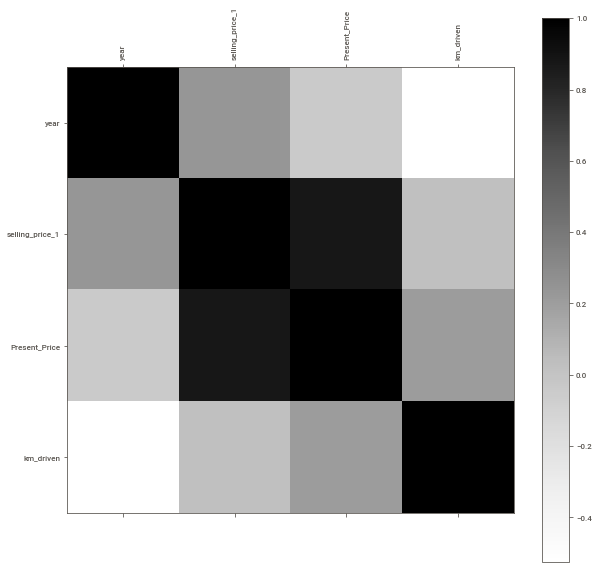

In [ ]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(car_dekho_2)

We see a positive correlation between Present Price and Selling Price which lies between 0.8 to 1.0 . Therefore lets assume that these two features might be related , normally selling  price is directly proportional to present price .We further draw a scatter plot to get more clear view 

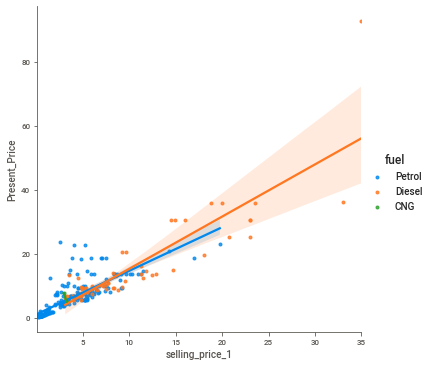

In [ ]:
sns.lmplot(data=car_dekho_2, x='selling_price_1' , y='Present_Price' , hue='fuel')

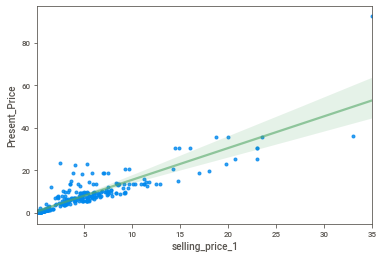

In [ ]:
sns.regplot(x=car_dekho_2['selling_price_1'] , y=car_dekho_2['Present_Price'] , line_kws = {'color':'g' , 'alpha':0.6})

Regression Plot to see how the selling price and present price are related . We see a positive correlation and hence a good regression line 

## **Merging both the datasets to work on a final dataset**



*   This Dataset will be used to create our machine learning model and do the EDA



In [ ]:
#Merging datasets using append function 
car = car_dekho_1.append(car_dekho_2)
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,selling_price_1,Present_Price
0,Maruti 800 AC,2007,60000.0,70000,Petrol,Individual,Manual,First Owner,0.60,NaN
1,Maruti Wagon R LXI Minor,2007,135000.0,50000,Petrol,Individual,Manual,First Owner,1.35,NaN
2,Hyundai Verna 1.6 SX,2012,600000.0,100000,Diesel,Individual,Manual,First Owner,6.00,NaN
3,Datsun RediGO T Option,2017,250000.0,46000,Petrol,Individual,Manual,First Owner,2.50,NaN
4,Honda Amaze VX i-DTEC,2014,450000.0,141000,Diesel,Individual,Manual,Second Owner,4.50,NaN


In [ ]:
car.shape

(4641, 10)

*The final dataset 'car' has* **4641 rows** and **9 columns** 

In [ ]:
car.dtypes

name                object
year                 int64
selling_price      float64
km_driven            int64
fuel                object
seller_type         object
transmission        object
owner               object
selling_price_1    float64
Present_Price      float64
dtype: object

In [ ]:
# Since there are 5 object data type features , creating a function to find unique values in the specified feature column .

def unique_val(col_name):
  print(col_name , ':' , car[col_name].unique())

unique_val('fuel')
unique_val('seller_type')
unique_val('transmission')
unique_val('owner')


fuel : ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
seller_type : ['Individual' 'Dealer' 'Trustmark Dealer']
transmission : ['Manual' 'Automatic']
owner : ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car' '0' '1' '3']


In [ ]:
car['fuel'].value_counts()

Petrol      2362
Diesel      2213
CNG           42
LPG           23
Electric       1
Name: fuel, dtype: int64

`value_counts()` allows you to show how many times each of the values of a categorical column appear.

Since Electric has only 1 data , therefore it might act as an outlier or is just not good for our dataset .

Therefore , while analysing and removing outliers , we might check if Electric is an outlier or not . If it is not we will still drop the entire row to have a better model.

In [ ]:
# Converting 'owner' column values into object datatype using astype() function
car['owner'] = car['owner'].astype(str) 

In [ ]:
car['owner'] = car['owner'].replace(['0','1','3'],['Second Owner','Third Owner','Test Drive Car'])
unique_val('owner')

owner : ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [ ]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,selling_price_1,Present_Price
0,Maruti 800 AC,2007,60000.0,70000,Petrol,Individual,Manual,First Owner,0.60,NaN
1,Maruti Wagon R LXI Minor,2007,135000.0,50000,Petrol,Individual,Manual,First Owner,1.35,NaN
2,Hyundai Verna 1.6 SX,2012,600000.0,100000,Diesel,Individual,Manual,First Owner,6.00,NaN
3,Datsun RediGO T Option,2017,250000.0,46000,Petrol,Individual,Manual,First Owner,2.50,NaN
4,Honda Amaze VX i-DTEC,2014,450000.0,141000,Diesel,Individual,Manual,Second Owner,4.50,NaN


In [ ]:
car.reset_index(drop=True, inplace=True)

In [ ]:
#dropping selling_price column
car.drop(['selling_price'] , axis=1 , inplace=True)

In [ ]:
car.tail()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price_1,Present_Price
4636,city,2016,33988,Diesel,Dealer,Manual,Second Owner,9.50,11.6
4637,brio,2015,60000,Petrol,Dealer,Manual,Second Owner,4.00,5.9
4638,city,2009,87934,Petrol,Dealer,Manual,Second Owner,3.35,11.0
4639,city,2017,9000,Diesel,Dealer,Manual,Second Owner,11.50,12.5
4640,brio,2016,5464,Petrol,Dealer,Manual,Second Owner,5.30,5.9


#**8. Finding & Removing Outliers (if any)**

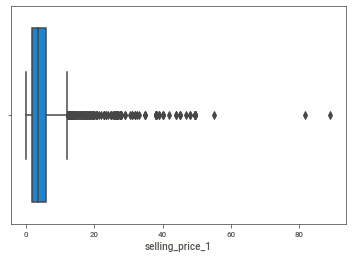

In [ ]:
# Box Plot to check outliers
sns.boxplot(car['selling_price_1'])

In [ ]:
#Calculating z-score
z = np.abs(stats.zscore(car['selling_price_1']))

In [ ]:
#Removing rows where z>10 .
car = car.drop(index=[89,3872])
car = car.drop(index=[3967])

Although the threshold is practiced to be in between z=3 or z=-3 , we take z=10 due to the less availability of data and to remove the outliers visualised in the box plot .

In [ ]:
car['fuel'].value_counts()

Petrol      2361
Diesel      2211
CNG           42
LPG           23
Electric       1
Name: fuel, dtype: int64

In [ ]:
car[car['fuel']=='Electric']

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price_1,Present_Price
4145,Toyota Camry Hybrid,2006,62000,Electric,Dealer,Automatic,Second Owner,3.1,NaN


Since there is only one data point where `fuel = 'Electric'` , therefore dropping the row to decrease the noise in the dataset

In [ ]:
car.drop(car.index[4145],inplace=True)
car[car['fuel']=='Electric']

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price_1,Present_Price
4145,Toyota Camry Hybrid,2006,62000,Electric,Dealer,Automatic,Second Owner,3.1,NaN


In [ ]:
car.shape

(4637, 9)

The number of rows decreased , therefore we conclude that the outliers with z-score > 10 have been removed


#**9. Finding and Visualising Mising Values Patterns**

In [ ]:
car.isnull().sum()

name                  0
year                  0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
selling_price_1       0
Present_Price      4336
dtype: int64

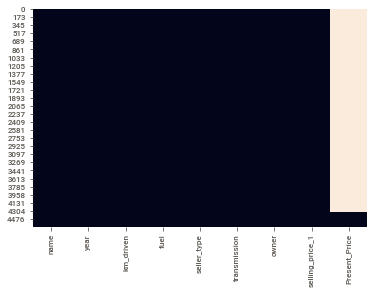

In [ ]:
# Visualising Missing value pattern from heatmap
sns.heatmap(car.isnull(), cbar=False)
plt.show()

# **10. Filling Values using different techniques**

## 1.Filling values using Statistical Imputation (Median)

In [ ]:
# Filling Missing values by median
median = car['Present_Price'].median()
final_car_median = car.copy()
final_car_median['Present_Price'] = final_car_median['Present_Price'].fillna(median)
final_car_median.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price_1,Present_Price
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,0.60,6.4
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,1.35,6.4
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,6.00,6.4
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,2.50,6.4
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,4.50,6.4


In [ ]:
final_car_median.isnull().sum()

name               0
year               0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
selling_price_1    0
Present_Price      0
dtype: int64

## 2.Filling values using Regression Imputation Algorithm





In [ ]:
car_model_1 = car.copy()
car_model_1.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price_1,Present_Price
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,0.60,NaN
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,1.35,NaN
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,6.00,NaN
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,2.50,NaN
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,4.50,NaN


In [ ]:
# Perform One Hot Encoding on Categorical Data
categorial = ['fuel' , 'seller_type' , 'transmission' , 'owner']
car_model_1 = pd.get_dummies(car_model_1, columns=categorial, drop_first=True)
car_model_1.drop(['name'] , axis=1 , inplace=True)
car_model_1.head()

,year,km_driven,selling_price_1,Present_Price,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,70000,0.60,NaN,0,0,0,1,1,0,1,0,0,0,0
1,2007,50000,1.35,NaN,0,0,0,1,1,0,1,0,0,0,0
2,2012,100000,6.00,NaN,1,0,0,0,1,0,1,0,0,0,0
3,2017,46000,2.50,NaN,0,0,0,1,1,0,1,0,0,0,0
4,2014,141000,4.50,NaN,1,0,0,0,1,0,1,0,1,0,0


In [ ]:
from sklearn.linear_model import LinearRegression
np.random.seed(42)
test_data = car_model_1[car_model_1['Present_Price'].isnull()]
car_model_1.dropna(inplace=True)

In [ ]:
car_model_1.head()

,year,km_driven,selling_price_1,Present_Price,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
4340,2014,27000,3.35,5.59,0,0,0,1,0,0,1,0,1,0,0
4341,2013,43000,4.75,9.54,1,0,0,0,0,0,1,0,1,0,0
4342,2017,6900,7.25,9.85,0,0,0,1,0,0,1,0,1,0,0
4343,2011,5200,2.85,4.15,0,0,0,1,0,0,1,0,1,0,0
4344,2014,42450,4.60,6.87,1,0,0,0,0,0,1,0,1,0,0


In [ ]:
test_data.head()

,year,km_driven,selling_price_1,Present_Price,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,70000,0.60,NaN,0,0,0,1,1,0,1,0,0,0,0
1,2007,50000,1.35,NaN,0,0,0,1,1,0,1,0,0,0,0
2,2012,100000,6.00,NaN,1,0,0,0,1,0,1,0,0,0,0
3,2017,46000,2.50,NaN,0,0,0,1,1,0,1,0,0,0,0
4,2014,141000,4.50,NaN,1,0,0,0,1,0,1,0,1,0,0


In [ ]:
y_train = car_model_1['Present_Price']
y_train.head()

4340    5.59
4341    9.54
4342    9.85
4343    4.15
4344    6.87
Name: Present_Price, dtype: float64

In [ ]:
x_train = car_model_1.drop('Present_Price' , axis=1)
x_test = test_data.drop('Present_Price' , axis=1)
model = LinearRegression()
model.fit(x_train , y_train)

y_pred = model.predict(x_test)

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.squeeze()
final_carr_model = car.copy()
final_carr_model['Present_Price'] = final_carr_model['Present_Price'].fillna(y_pred)
final_carr_model.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price_1,Present_Price
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,0.60,10.323799
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,1.35,11.337132
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,6.00,14.868169
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,2.50,6.144953
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,4.50,7.298079


In [ ]:
final_carr_model.corr()

,year,km_driven,selling_price_1,Present_Price
year,1.000000,-0.422832,0.418756,0.055325
km_driven,-0.422832,1.000000,-0.177614,-0.043446
selling_price_1,0.418756,-0.177614,1.000000,0.191210
Present_Price,0.055325,-0.043446,0.191210,1.000000


In [ ]:
categorial = ['fuel' , 'seller_type' , 'transmission' , 'owner']
final_carr_model = pd.get_dummies(final_carr_model, columns=categorial, drop_first=True)
final_carr_model.drop(['name'] , axis=1 , inplace=True)
final_carr_model.head()

,year,km_driven,selling_price_1,Present_Price,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,70000,0.60,10.323799,0,0,0,1,1,0,1,0,0,0,0
1,2007,50000,1.35,11.337132,0,0,0,1,1,0,1,0,0,0,0
2,2012,100000,6.00,14.868169,1,0,0,0,1,0,1,0,0,0,0
3,2017,46000,2.50,6.144953,0,0,0,1,1,0,1,0,0,0,0
4,2014,141000,4.50,7.298079,1,0,0,0,1,0,1,0,1,0,0


In [ ]:
final_carr_model.isnull().sum()

year                            0
km_driven                       0
selling_price_1                 0
Present_Price                   4
fuel_Diesel                     0
fuel_Electric                   0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Manual             0
owner_Fourth & Above Owner      0
owner_Second Owner              0
owner_Test Drive Car            0
owner_Third Owner               0
dtype: int64

There are still 4 missing values in the `Present Price` column. 

Filling the values with the median .

In [ ]:
median = final_carr_model['Present_Price'].median()
median
final_carr_model['Present_Price'] = final_carr_model['Present_Price'].fillna(median)
final_carr_model.isnull().sum()

year                            0
km_driven                       0
selling_price_1                 0
Present_Price                   0
fuel_Diesel                     0
fuel_Electric                   0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Manual             0
owner_Fourth & Above Owner      0
owner_Second Owner              0
owner_Test Drive Car            0
owner_Third Owner               0
dtype: int64

## 3.Filling values using MICE Algorithm

In [ ]:
# Perform One Hot Encoding on Categorical Data
c = car.copy(deep=True)
categorial = ['fuel' , 'seller_type' , 'transmission' , 'owner']
c = pd.get_dummies(c, columns=categorial, drop_first=True)
c.drop(['name'] , axis=1 , inplace=True)
c.head()

,year,km_driven,selling_price_1,Present_Price,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,70000,0.60,NaN,0,0,0,1,1,0,1,0,0,0,0
1,2007,50000,1.35,NaN,0,0,0,1,1,0,1,0,0,0,0
2,2012,100000,6.00,NaN,1,0,0,0,1,0,1,0,0,0,0
3,2017,46000,2.50,NaN,0,0,0,1,1,0,1,0,0,0,0
4,2014,141000,4.50,NaN,1,0,0,0,1,0,1,0,1,0,0


In [ ]:
# Dropping the fuel_Electric Column since there is only one data point where fuel=Electric
c.drop(['fuel_Electric'] , axis = 1 , inplace=True)

# Using Mice Algorithm
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
c.iloc[:, :] = MICE_imputer.fit_transform(c)

In [ ]:
c.head()

,year,km_driven,selling_price_1,Present_Price,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007.0,70000.0,0.60,6.735223,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2007.0,50000.0,1.35,7.702700,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2012.0,100000.0,6.00,11.349869,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2017.0,46000.0,2.50,2.367144,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2014.0,141000.0,4.50,7.619203,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
car.tail()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price_1,Present_Price
4636,city,2016,33988,Diesel,Dealer,Manual,Second Owner,9.50,11.6
4637,brio,2015,60000,Petrol,Dealer,Manual,Second Owner,4.00,5.9
4638,city,2009,87934,Petrol,Dealer,Manual,Second Owner,3.35,11.0
4639,city,2017,9000,Diesel,Dealer,Manual,Second Owner,11.50,12.5
4640,brio,2016,5464,Petrol,Dealer,Manual,Second Owner,5.30,5.9


# **11. Modeling the dataset where missing values were filled by Regression Imputation Algorithm**

Using the sci-kit estimator workflow for choosing models , implementing different models on datasets

## Preparing Data for Machine Learning Model

In [ ]:
x = final_carr_model.drop('selling_price_1' , axis = 1)
y = final_carr_model['selling_price_1'].values

np.random.seed(42)
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

# Normalize the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


## **Models**

## Lasso Regression

In [ ]:
# Using Lasso Regression
from sklearn import linear_model
model_lasso = linear_model.Lasso(alpha=0.1)
model_lasso.fit(x_train , y_train)
y_test_pred_lasso = model_lasso.predict(x_test)

# R^2 Score
print(model_lasso.score(x_test , y_test))

#Root Mean Squared Value for cross verification
RMSE_LASSO_test = sqrt(mean_squared_error(y_test, y_test_pred_lasso))
print("RMSE for Testing Data: ", RMSE_LASSO_test)

0.42657526184930794
RMSE for Testing Data:  3.752161684668691


## Support Vector Machine (SVM)

In [ ]:
# Using SVM 
from sklearn import svm
model_svm = svm.SVR()
model_svm.fit(x_train , y_train)
y_test_pred_svm = model_svm.predict(x_test)

# R^2 Score
print(model_svm.score(x_test , y_test))

#Root Mean Squared Value for cross verification
RMSE_SVM_test = sqrt(mean_squared_error(y_test, y_test_pred_svm))
print("RMSE for Testing Data: ", RMSE_SVM_test)

0.5214892152523976
RMSE for Testing Data:  3.427592604138502


## Decision Tree Regressor

In [ ]:
# Using Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor  
decision_tree_reg = DecisionTreeRegressor()  
decision_tree_reg.fit(x_train, y_train) 
y_test_pred_dtr = decision_tree_reg.predict(x_test)

# R^2 Score
print(decision_tree_reg.score(x_test, y_test))

#Root Mean Squared Value for cross verification
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_test_pred_dtr))
print("RMSE for Testing Data: ", RMSE_DTR_test)

0.377426675028379
RMSE for Testing Data:  3.909656356161736


##Random Forest Regressor

In [ ]:
# Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor  
random_forest_reg = RandomForestRegressor() 
random_forest_reg.fit(x_train, y_train) 
y_test_pred_rfr = random_forest_reg.predict(x_test)

# R^2 Score
print(random_forest_reg.score(x_test, y_test))

#Root Mean Squared Value for cross verification
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_test_pred_rfr))
print("RMSE for Testing Data: ", RMSE_RFR_test)

0.6712157661413038
RMSE for Testing Data:  2.8411804896135835


# **12. Modeling the dataset where missing values were filled by MICE Algorithm** 

Using the sci-kit estimator workflow for choosing models , implementing different models on datasets

## Preparing Data for Machine Learning Model

In [ ]:
X = c.drop('selling_price_1' , axis = 1)
Y = c['selling_price_1'].values


np.random.seed(42)
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2)

# Normalize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Models**

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor  
# Using Random Forest Regressor
random_forest_reg = RandomForestRegressor() 
random_forest_reg.fit(X_train, Y_train) 
y_train_pred_rfg = random_forest_reg.predict(X_train)

y_test_pred_rfg = random_forest_reg.predict(X_test)

# R^2 value
print(random_forest_reg.score(X_test, Y_test))

# Root Mean Squared Value for cross verification
RMSE_RFR_test = sqrt(mean_squared_error(Y_test, y_test_pred_rfg))
print("RMSE for Testing Data: ", RMSE_RFR_test)

# Actual & Predicted Comparison 
# results = pd.DataFrame({'Actual': Y_test, 'Predicted': y_test_pred_rfg})
# results['Predicted'] = round(results['Predicted'] , 2)

0.9911150140853588
RMSE for Testing Data:  0.46705895541575027


## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor  

# Using Decision Tree Regressor
decision_tree_reg = DecisionTreeRegressor()  
decision_tree_reg.fit(X_train, Y_train) 
y_test_pred_dtr = decision_tree_reg.predict(X_test)

# R^2 value
print(decision_tree_reg.score(X_test, Y_test))

# Root Mean Squared Value for cross verification
RMSE_DTR_test = sqrt(mean_squared_error(Y_test, y_test_pred_dtr))
print("RMSE for Testing Data: ", RMSE_DTR_test)

0.9832490915633842
RMSE for Testing Data:  0.6413018816815337


## Support Vector Machines (SVM)

In [ ]:
from sklearn import svm

# Using Decision Tree Regressor
model_svm = svm.SVR()
model_svm.fit(X_train , Y_train)
y_test_pred_svm = model_svm.predict(X_test)


# R^2 value
print(model_svm.score(X_test , Y_test))

# Root Mean Squared Value for cross verification
RMSE_SVM_test = sqrt(mean_squared_error(Y_test, y_test_pred_svm))
print("RMSE for Testing Data: ", RMSE_SVM_test)

0.9073315788730568
RMSE for Testing Data:  1.5083746107592484


## Ridge Regression

In [ ]:
from sklearn import linear_model

# Using Multiple Linear Regression
model_ridge = linear_model.Ridge(alpha=.5)
model_ridge.fit(X_train , Y_train)
y_test_pred_lm = model_ridge.predict(X_test)

# R^2 value
print(model_ridge.score(X_test , Y_test))

# Root Mean Squared Value for cross verification
RMSE_MLR_test = sqrt(mean_squared_error(Y_test, y_test_pred_lm))
print("RMSE for Testing Data: ", RMSE_MLR_test)

0.9913705779175762
RMSE for Testing Data:  0.46029280646587634


In [ ]:
input_data = {'year': [2015],
              'km_driven': [28000],
              'Present_Price': [13.36],
              'fuel_Diesel': [1],
              'fuel_LPG' : [0],
              'fuel_Petrol':[0],
              'seller_type_Individual':[0],
              'seller_type_Trustmark Dealer': [1],
              'transmission_Manual':[1],
              'owner_Fourth & Above Owner':[0],
              'owner_Second Owner':[0],
              'owner_Test Drive Car':[0],
              'owner_Third Owner':[0],
}


# Convert to pandas dataframe
input_data = pd.DataFrame(input_data)

# Transform data using sc.transform
input_data = sc.transform(input_data)

# Reshape data for input into our model predict function
input_data = input_data.reshape(1, -1)

# Run prediction for our test sameple
# model.predict(input_data)

# print probabilities of belonging to either class
# model.predict_proba(input_data)

In [ ]:
random_forest_reg.predict(input_data)

array([8.8288])

In [ ]:
model_ridge.predict(input_data)

array([9.06078758])

#**13. Result**

# *R^2 Score is far more better in models of dataset where missing values were imputed from MICE algorithm , therefore ignoring Regression Imputation Algorithm & selecting the models from modeling of MICE algorithm dataset*

# **Now , the best model from the MICE Algorithm dataset was**

`**RIDGE REGRESSION**`

`**RANDOM FOREST REGRESSOR**`

# **both giving the R^2 Score of 0.99 and RMSE of 0.46 .**


**The `Decision Tree Regression` gave an R^2 Score of 0.98 and an RMSE of 0.64**



# *Therefore , as we have our best model , lets predict some Selling Price of cars listed at [CarDekho](https://https://www.cardekho.com/) in real time and cross-verify the same .* 

# **Let's check how good our model actually is !!!!**

# Outputs

In [ ]:
input_data_1 = {'year': [2017],
              'km_driven': [5000],
              'Present_Price': [6.87],
              'fuel_Diesel': [0],
              'fuel_LPG' : [0],
              'fuel_Petrol':[1],
              'seller_type_Individual':[0],
              'seller_type_Trustmark Dealer': [1],
              'transmission_Manual':[1],
              'owner_Fourth & Above Owner':[0],
              'owner_Second Owner':[0],
              'owner_Test Drive Car':[0],
              'owner_Third Owner':[0],
}



# Convert to pandas dataframe
input_data_1 = pd.DataFrame(input_data_1)

# Transform data using sc.transform
input_data_1 = sc.transform(input_data_1)

# Reshape data for input into our model predict function
input_data_1 = input_data_1.reshape(1, -1)

In [ ]:
print('Random Forest Regressor Prediction :' , random_forest_reg.predict(input_data_1))
print('Ridge Regression Prediction :' , model_ridge.predict(input_data_1))

Random Forest Regressor Prediction : [5.51]
Ridge Regression Prediction : [5.56671996]


Our model predicted value close to 5.5 

Now , lets check the value at `CarDekho` 

*You can check the value* [here](https://www.cardekho.com/used-car-details/used-Hyundai-Grand-i10-1.2-Kappa-Sportz-BSIV-cars-Bangalore_B90CB5E32F190154C13E4BE9CAC17B85.htm)

*If you checked*


***Predicted Price :*** `5.56 lakhs`

***Selling Price at Car Dekho :*** `5.85 lakhs`

In [ ]:
input_data_2 = {'year': [2019],
              'km_driven': [6335],
              'Present_Price': [14.21],
              'fuel_Diesel': [0],
              'fuel_LPG' : [0],
              'fuel_Petrol':[1],
              'seller_type_Individual':[1],
              'seller_type_Trustmark Dealer': [0],
              'transmission_Manual':[1],
              'owner_Fourth & Above Owner':[0],
              'owner_Second Owner':[0],
              'owner_Test Drive Car':[0],
              'owner_Third Owner':[0],
}



# Convert to pandas dataframe
input_data_2 = pd.DataFrame(input_data_2)

# Transform data using sc.transform
input_data_2 = sc.transform(input_data_2)

# Reshape data for input into our model predict function
input_data_2 = input_data_2.reshape(1, -1)

In [ ]:
print('Random Forest Regressor Prediction :' , random_forest_reg.predict(input_data_2))
print('Ridge Regression Prediction :' , model_ridge.predict(input_data_2))

Random Forest Regressor Prediction : [10.7897]
Ridge Regression Prediction : [10.84047047]


Our model predicted value close to 10.8 

Now , lets check the value at `CarDekho` 

*You can check the value* [here](https://www.cardekho.com/used-car-details/used-Hyundai-Creta-2015-2020-1.6-SX-Option-Executive-cars-Bangalore_82BA4DB567AF0494D027466F9C5D79A1.htm)

*If you checked*


***Predicted Price :*** `10.84 lakhs`

***Selling Price at Car Dekho :*** `13.48 lakhs`